In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
XorInput = np.array([[0,0],[0,1],[1,0],[1,1]])
XorOutput = np.array([[0],[1],[1],[0]])

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def diff_sigmoid(x):
    return x*(1-x)
def predict(X):
    hidden_layer = np.dot(X, hidden_weight)
    hidden_layer += hidden_bias
    hidden_layer_output = sigmoid(hidden_layer)

    output_layer = np.dot(hidden_layer_output, output_weight)
    output_layer += output_bias
    predicted = sigmoid(output_layer)
    return predicted

In [4]:
epoch = 10000
lr = 0.1
hidden_weight = np.random.uniform(size=(2,2))
hidden_bias = np.random.uniform(size=(1,2))
output_weight = np.random.uniform(size=(2,1))
output_bias = np.random.uniform(size=(1,1))

In [5]:
print(hidden_weight)
print(hidden_bias)
print(output_weight)
print(output_bias)

[[0.89561768 0.43702152]
 [0.62199764 0.77040503]]
[[0.52157445 0.62248716]]
[[0.69487747]
 [0.14030022]]
[[0.45642155]]


In [10]:
history  = []
for i in range(epoch):
    #forward propagation
    hidden_layer = np.dot(XorInput, hidden_weight)
    hidden_layer += hidden_bias
    hidden_layer_output = sigmoid(hidden_layer)

    output_layer = np.dot(hidden_layer_output, output_weight)
    output_layer += output_bias
    predicted = sigmoid(output_layer)
    #back propagation
    error = (-XorOutput + predicted)
    diff_output_error = error*diff_sigmoid(predicted)

    hidden_error = np.dot(diff_output_error,output_weight.T)
    diff_hidden_error = hidden_error*diff_sigmoid(hidden_layer_output)

    #update weight
    output_weight = output_weight - np.dot(hidden_layer_output.T,diff_output_error)*lr
    output_bias = output_bias - np.sum(diff_output_error, axis=0, keepdims=True)*lr

    hidden_weight = hidden_weight - np.dot(XorInput.T,diff_hidden_error, )*lr
    hidden_bias = hidden_bias - np.sum(diff_hidden_error, axis=0, keepdims=True)*lr 
    
    new_dict = {}
    new_dict['epoch'] = i
    new_dict['error'] = np.mean(np.square(-XorOutput+ predict(XorInput)))
    history.append(new_dict)
    

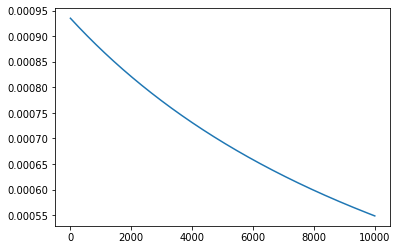

In [11]:
df = pd.DataFrame(history)
plt.plot(df['epoch'], df['error'])

In [12]:
predict(XorInput)

array([[0.02560275],
       [0.97772843],
       [0.97763801],
       [0.023296  ]])